# フィードフォワードネットワーク関数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## データ

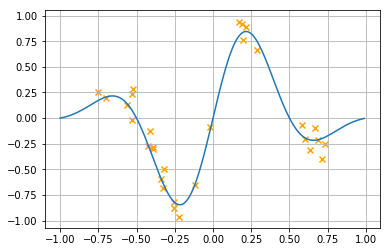

In [2]:
# データ数
N = 30

# 推定する目的関数
def f(x, var=0):
    y = np.sin(x*2*np.pi) * np.exp(-(x**2) / (2*0.4**2))
    n = np.random.normal(0, var, size=y.shape)
    return y + n

# データ
x = np.random.uniform(-0.75, 0.75, size=N).reshape(N, 1)
t = f(x, 0.1).reshape(N, 1)
x_test = np.arange(-1, 1, 0.01).reshape(-1, 1)
t_test = f(x_test)
plt.scatter(x, t, marker='x', color='orange')
plt.plot(x_test, t_test)
plt.grid()
plt.show()

## 活性化関数
tanhを用いる

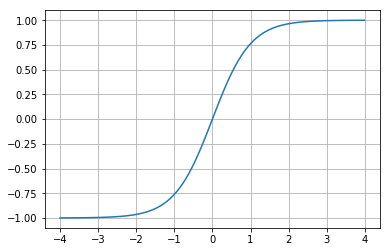

In [3]:
## 活性化関数
def h(x):
    return np.tanh(x)

plt.plot(np.arange(-4, 4, 0.01), h(np.arange(-4, 4, 0.01)))
plt.grid()
plt.show()

## 学習

In [4]:
# 入力次元D=1, 出力次元K=1, 隠れ層ノード数M
D = 1
K = 1
M = 10
η = 0.01
# 学習するパラメータ, w_ji, b_j, w_kj, b_k
W1 = np.random.randn(M, D)
b1 = np.random.randn(M)
W2 = np.random.randn(K, M)
b2 = np.random.randn(K)

test_losses = []
train_losses = []
for i in range(2000+1):
    # forward
    a = x@W1.T + b1
    z = h(a)
    y = z@W2.T + b2

    # backward
    δ2 = y - t
    δ1 = (1 - z**2)*(δ2@W2)

    ΔW1 = (δ1[:,:,np.newaxis] * x[:,np.newaxis,:]).sum(axis=0)
    Δb1 = δ1.sum(axis=0)
    ΔW2 = (δ2[:,:,np.newaxis] * z[:,np.newaxis,:]).sum(axis=0)
    Δb2 = δ2.sum(axis=0)

    # update
    W1 -= η*ΔW1
    b1 -= η*Δb1
    W2 -= η*ΔW2
    b2 -= η*Δb2
    
    # calc loss
    y_test = h(x_test@W1.T + b1)@W2.T + b2
    test_loss = ((t_test - y_test)**2).mean()
    y = h(x@W1.T + b1)@W2.T + b2
    train_loss = ((t - y)**2).mean()

    test_losses.append(test_loss)
    train_losses.append(train_loss)
    # print info
    if i % 50 == 0:
        print('iter: {:>4}, train loss: {:.4f}, test loss: {:.4f}'.format(i, train_loss, test_loss))

iter:    0, train loss: 19.2487, test loss: 18.3729
iter:   50, train loss: 0.1809, test loss: 0.1184
iter:  100, train loss: 0.1310, test loss: 0.1156
iter:  150, train loss: 0.0879, test loss: 0.1461
iter:  200, train loss: 0.0617, test loss: 0.1842
iter:  250, train loss: 0.0482, test loss: 0.2094
iter:  300, train loss: 0.0411, test loss: 0.2198
iter:  350, train loss: 0.0371, test loss: 0.2205
iter:  400, train loss: 0.0345, test loss: 0.2161
iter:  450, train loss: 0.0326, test loss: 0.2092
iter:  500, train loss: 0.0312, test loss: 0.2013
iter:  550, train loss: 0.0300, test loss: 0.1930
iter:  600, train loss: 0.0289, test loss: 0.1845
iter:  650, train loss: 0.0278, test loss: 0.1762
iter:  700, train loss: 0.0269, test loss: 0.1680
iter:  750, train loss: 0.0259, test loss: 0.1603
iter:  800, train loss: 0.0250, test loss: 0.1531
iter:  850, train loss: 0.0242, test loss: 0.1463
iter:  900, train loss: 0.0233, test loss: 0.1401
iter:  950, train loss: 0.0226, test loss: 0.134

## 結果

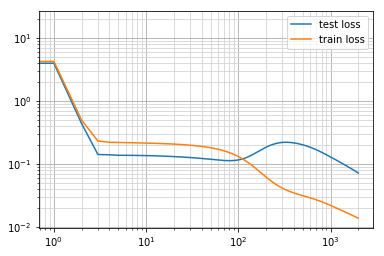

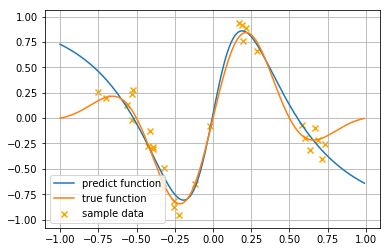

In [5]:
plt.plot(test_losses, label='test loss')
plt.plot(train_losses, label='train loss')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='major',color='darkgray')
plt.grid(which='minor',color='lightgray')
plt.legend()
plt.show()

x_test = np.arange(-1, 1, 0.01).reshape(-1, 1)
y_test = h(x_test@W1.T + b1)@W2.T + b2
plt.plot(x_test, y_test, label='predict function')
plt.scatter(x, t, marker='x', color='orange', label='sample data')
plt.plot(np.arange(-1, 1, 0.01), f(np.arange(-1, 1, 0.01)), label='true function')
plt.grid()
plt.legend()
plt.show()